# **CALIFORNIA HOSPITAL DISCHARGE AND READMISSION ANALYSIS**

# **Introduction**
Hospital readmission rates have become an important quality metric and focus area for improving care across health systems. This project analyzes inpatient discharge data, admission trends, readmission rates, and key related metrics aggregated at the county level across California hospitals and facilities. The datasets which are chosen compiles hospital utilization patterns from public California records into a unified profile of geographic and provider variation in outcomes.

Goals:

✈ Compare and contrast the inpatient visit patterns, discharges, and readmissions between facility-based and home-based hospice types.

✈ Evaluate variations in inpatient visits, discharges, and readmissions across different counties in California and identify regions with higher or lower healthcare utilization for targeted interventions.

✈ Identifying trends and most impactful diagnostic categories in inpatient visits that can guide resource allocation and capacity planning.

✈ Identifying prevalent health issues within a county can inform targeted interventions and outreach programs aimed at reducing the risk of readmissions for specific health conditions.

✈ Investigate how primary diagnoses impact discharge trends.

✈ Explore how population demographics (age, race, ethnicity) correlate with inpatient visits, discharges, and readmissions.

While many studies examine hospital readmissions, there has been less county-specific analysis of the interplay between various utilization factors. Examining how admission volumes, discharge dispositions, and 30-day readmissions correlate at the county population level could show the associations between healthcare access, community demographics, service availability, and patient outcomes.The "30-day Readmission Rate" is a crucial metric for assessing the effectiveness of care transitions and post-discharge management. High readmission rates may indicate challenges in continuity of care, medication adherence, or patient education.

I have chosen California because it has a dynamic and complex healthcare system with a mix of urban and rural areas. Studying hospital readmissions in this diverse environment can yield insights applicable to a wide range of healthcare settings. California faces unique health challenges, including a large aging population, disparities in healthcare access, and a diverse set of health risk factors.

The datasets that i have chosen has the data common for the year '2018'. Many dataset time lags are 3-5 years on health data, making 2018 a current dataset.while data from additional years would enrich the analysis, this cross-sectional view of 2018 still holds value for informing regional health system strengths, and opportunities to potentially lower hospital readmission rates through community-based initiatives.





---



# **Data Extraction**
I have used four datasets out of which, 2 are of csv(comma-seperated value) format and remaining are xlsx(excel) format.


*    The inpatient visits dataset, an excel file obtained from https://data.chhs.ca.gov/dataset/hospice-utilization-patient-demographics/resource/e63c97c4-80d3-4908-9374-11ec9f4fff38?view_id=35a891f6-4435-48dd-bc6c-dfc72fe56c96
*   The discharges dataset, a csv file taken from https://data.world/chhs/44f54d54-e12c-4c06-b32e-924ecf4410d5/workspace/file?filename=hospital-inpatient-characteristics-mdc-by-patient-county-of-residence.csv
*  The county population dataset, an excel file obtained from https://dof.ca.gov/forecasting/demographics/estimates/e-4-population-estimates-for-cities-counties-and-the-state-2011-2020-with-2010-census-benchmark-new/
*   The readmission dataset, a csv file obtained from https://data.chhs.ca.gov/dataset/all-cause-unplanned-30-day-hospital-readmission-rate-california/resource/8dd44ad7-9e78-4c1a-9910-f58a47e402af?inner_span=True



In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



# **Data - Inpatient visits based on Hospice type in California**
This dataset contains counts of inpatient visits leading to a discharge to hospice care. Inpatient visits included in the counts consist of individuals aged 18 or over with a discharge disposition leading to home or facility hospice care. The total counts per each individual year can be viewed based on different patient characteristics, including patient age groups, individual counties of residence, primary payer type, diagnosis category, and patient sex/race/ethnicity. The disease categories include circulatory conditions, diabetes, malignant/benign neoplasms, malnutrition, neurodegenerative disease, renal failure or other kidney diagnoses, respiratory conditions and circulatory conditions. The categories represent common groupings of diagnoses seen in other studies related to hospice care and were created by grouping together relevant medical MSDRG codes in the HCAI inpatient data.

The columns in the dataset are: The Hospice_Type indicates the type of hospice (home or facility-based hospice) that the patient was discharged to at the end of their inpatient stay, the demographics indicate the larger demographic category, including AgeGroup, PatientCounty, PatientSex, Payer, PrimaryDiagnosis, and RaceEthnicityGroup, the subgroup indicates the groups within each larger demographic category, including age ranges, counties, patient sex, primary payer type, diagnosis category, and patient race/ethnicity, the count indicates the year of the inpatient visit leading to a discharge to hospice.



The inpatient visits dataset is loaded which is extracted from data.chhs.ca.gov. The data provides insights into the demographics of patients in different hospice settings (Facility and Home). Understanding the age groups and race/ethnicity distribution can help hospitals tailor their services to the specific needs of different patient populations.The data can be useful for planning healthcare programs and services. For example, if there's an increasing count of patients in the "Home" hospice type, hospitals might consider expanding home-based healthcare services to meet the demand.year is set as index to match the data with other dataframes. some of the cleaning/ data transformation steps like renaming the column to match with the other datasets.

In [ ]:
# reading the inpatient visits dataframe
inpatient_visits=pd.read_excel('/content/hospice_demographics_18_21_dataset_dec_2022 (1).xlsx')
inpatient_visits.set_index("Year")

,Hospice_Type,Demographics,SubGroup,COUNT
Year,,,,
2018,Facility,AgeGroup,18 to 29,57
2018,Facility,AgeGroup,30 to 49,396
2018,Facility,AgeGroup,50 to 69,2586
2018,Facility,AgeGroup,70 to 89,5524
2018,Facility,AgeGroup,90+,2161
...,...,...,...,...
2021,Home,RaceEthnicityGroup,Asian/PI,4405
2021,Home,RaceEthnicityGroup,Black,2793
2021,Home,RaceEthnicityGroup,Hispanic,9461


In [ ]:
# renaming the column
inpatient_visits.rename(columns={"COUNT":"InpatientVisits"},inplace=True)
county=inpatient_visits["Demographics"]=="PatientCounty"

**Pivoting**

The pivoting is done on the dataframe to include the counties of california state from the subgroup column which is set as index. This pivoted data is filtered to get the information on different hospice type visits of various races.

In [ ]:
# pivoting/ converting the inpatient_visits dataframe long to wide having the count of inpatient visits
index_list= ['Hospice_Type','Demographics',"SubGroup"]
inpatient_visits_wide = inpatient_visits.pivot(index=index_list, columns='Year', values='InpatientVisits')
inpatient_visits_wide

Year                                          2018     2019     2020     2021
Hospice_Type Demographics       SubGroup                                     
Facility     AgeGroup           18 to 29      57.0     59.0     44.0     55.0
                                30 to 49     396.0    467.0    397.0    476.0
                                50 to 69    2586.0   2714.0   2626.0   2982.0
                                70 to 89    5524.0   5757.0   5723.0   6254.0
                                90+         2161.0   2356.0   2147.0   2210.0
...                                            ...      ...      ...      ...
Home         RaceEthnicityGroup Asian/PI    3687.0   3433.0   4139.0   4405.0
                                Black       2362.0   2249.0   2623.0   2793.0
                                Hispanic    8806.0   7581.0   8944.0   9461.0
                                Other/Unk   1408.0   1618.0   2166.0   2249.0
                                White      22670.0  21890.0  23012.0  23641.0

[171 rows x 4 columns]

The dataframe is filtered to include the different age groups and their inpatient visits both in home and facility type of hospice. Age influences health conditions and likelihood of needing follow-up services after hospital discharge. Younger and working age adult groups tend to have lower readmission rates compared to elderly patients. Segmenting by age group will reveal if certain county healthcare resources serve specific age groups better.
Grouping patients by age helps identify counties where older adult patients may lack caregiver assistance, transportation access or abilities for self-care after hospital visits.

In [ ]:
# filtering the dataframe to include the age groups
age_groups=inpatient_visits_wide[inpatient_visits_wide.index.get_level_values('Demographics') == 'AgeGroup']
age_groups=age_groups.rename(columns={2018:"Inpatient_visits_in_2018"})
age_2018_inpatient_visits = age_groups.loc['Facility', :, :].loc[:, 'Inpatient_visits_in_2018']

**Data Visualization-1**

A horizontal barplot is plotted to show the inpatient visits based on age groups in 2018 for 'facility' hospice type.

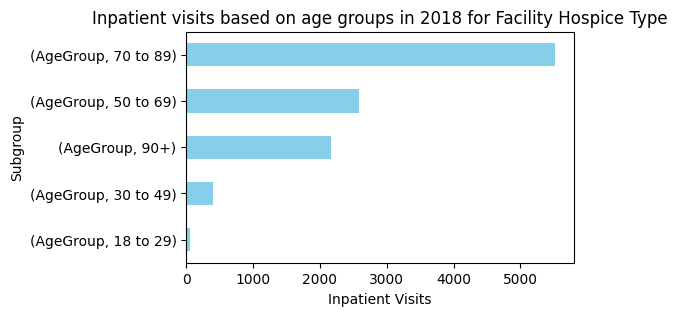

In [ ]:
# plotting a horizontal barplot to show the inpatient visits based on age groups in 2018 for 'facility' hospice type
plt.figure(figsize=(5, 3))
age_2018_inpatient_visits.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Inpatient Visits')
plt.ylabel('Subgroup')
plt.title('Inpatient visits based on age groups in 2018 for Facility Hospice Type')
plt.show()

**Interpretation**

This horizontal bar graph illustrates the number of inpatient visits across different age groups for facility-based hospice care in 2018. The x-axis represents the volume of inpatient visits, while the y-axis categorizes patients by age group.

The data clearly show that older adults make up the majority of inpatient hospice visits, specifically, The age group 70 to 89 recorded the highest number of visits, with approximately 5,500 visits, indicating the greatest demand for end-of-life facility-based care, the 50 to 69 and 90+ age groups follow with roughly 2,500 and 2,000 visits respectively. There is a significant drop in visits among younger populations: The 30 to 49 age group shows fewer than 500 visits. The 18 to 29 group records negligible usage, with visit counts near zero.

This distribution aligns with expectations, as hospice care is primarily utilized by elderly individuals, who are more likely to experience terminal illnesses and require supportive end-of-life care in a facility setting. The presence of visits among middle-aged adults, although much lower, still highlights that hospice services are occasionally needed for younger patients with serious conditions.

The filter is performed to include the diagnosis data so that Facilities can use this information to manage costs effectively. By understanding the types of diagnoses that lead to inpatient visits, facilities can optimize their services and resource utilization, potentially leading to cost savings. Drawing a piechart shows the percentage distribution of each diagnosis for tthe inpatient visits in he facility type hospice type.

In [ ]:
# filtering the dataframe to get the desired values and renaming the column
diagnosis= inpatient_visits_wide[inpatient_visits_wide.index.get_level_values('Demographics') == 'PrimaryDiagnosis']
diagnosis=diagnosis.rename(columns={2018:"Inpatient_visits_in_2018"})

**Data visualization-2**

A piechart is plotted to show the inpatient visits for 'facility' hospice tyep based on diagnoses.

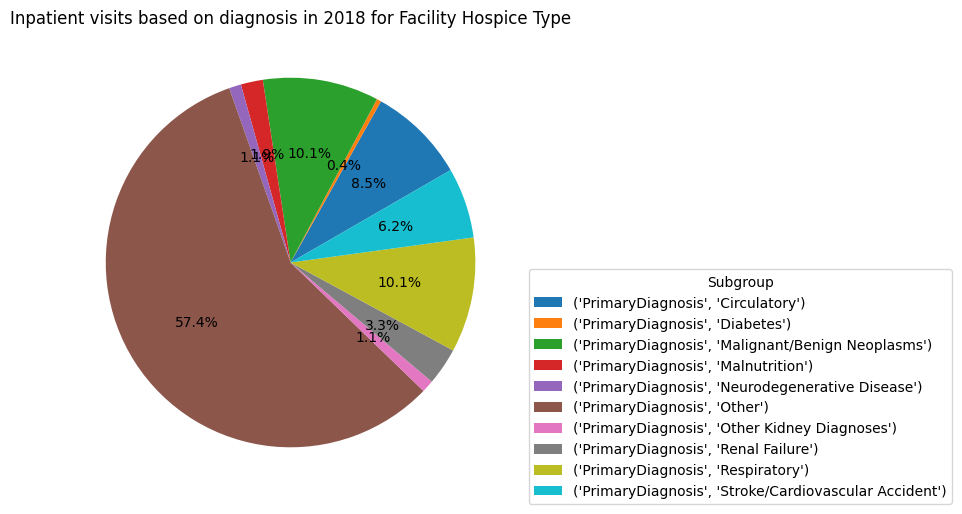

In [ ]:
# plotting a pie chart showing the inpatient visits for facility based hospice type in 2018
facility_2018_inpatient_visits = diagnosis.loc['Facility', :, :].loc[:, 'Inpatient_visits_in_2018']
plt.figure(figsize=(8, 6))
plt.pie(facility_2018_inpatient_visits, autopct='%1.1f%%', startangle=30)
plt.legend(facility_2018_inpatient_visits.index, title='Subgroup', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Inpatient visits based on diagnosis in 2018 for Facility Hospice Type')
plt.show()

**Interpretation**

This pie graph depicts the breakdown of facility hospice inpatient visits across different primary diagnosis categories for the year 2018. Slices are proportional to the volume of visits attributed to each diagnosis group out of the total visits. Other diseases together contributed to 57.4%, followed by neoplasms which are 10.1%, and respiratory diseases contributed to 10.1% while other categories like Diabetes, Malnutrition and Renal failure together ranging between 5-8% of visits.

Seeing proportional diagnosis patterns helps administrators match facility hospice service capabilities and capacity to population needs. Comparing diagnosis trends over time can also reveal growth areas to address through expanded beds or services tailored to emerging diagnoses.

The data frame is filtered to include only counties, 2018, and hospice type information and the same way it is filtered to get the facility type information.

In [ ]:
# filtering the data frame to get the 2018 year, county and facility hospice values from the mentioned columns
year_2018=inpatient_visits["Year"]==2018
county=inpatient_visits["Demographics"]=="PatientCounty"
hospice=inpatient_visits["Hospice_Type"]=="Facility"
facility_visits=inpatient_visits[county & year_2018 & hospice]

In [ ]:
# renaming the column name
facility_visits.rename(columns={"SubGroup":"COUNTY"},inplace=True)

<ipython-input-28-f2bf2adc7622>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility_visits.rename(columns={"SubGroup":"COUNTY"},inplace=True)


In [ ]:
#filtering the dataframe to get the home hospice type, 2018 data and county related data
home_hospice = inpatient_visits["Hospice_Type"] == "Home"
visits_home = inpatient_visits[county & year_2018 & home_hospice]
visits_home.rename(columns={"SubGroup":"COUNTY"},inplace=True)

<ipython-input-29-6d725b8de72f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_home.rename(columns={"SubGroup":"COUNTY"},inplace=True)




---



# **Data - County population**

This dataset contains information on county population of California state from 2010 to 2020.Counties with larger populations may require different resource allocation strategies. Hospitals and healthcare systems can use population data to anticipate the demand for healthcare services, allocate resources effectively. This dataset is chosen because it contains information on county population which is helpful to compare the readmissions, admits, discharges, inpatient visits data for a particular county.

In [ ]:
# reading the county population dataframe and removing the first row
county_population=pd.read_excel("/content/ca county population.xlsx", header=1)
# setting the index
#county_population.set_index("COUNTY")
county_population.head()

,COUNTY,4/1/2010,1/1/2011,1/1/2012,1/1/2013,1/1/2014,1/1/2015,1/1/2016,1/1/2017,1/1/2018,1/1/2019,1/1/2020
0,Alameda,1510271,1525761,1545917,1569989,1590729,1613319,1631230,1644303,1651760,1659608,1663114
1,Alpine,1175,1169,1166,1164,1163,1162,1162,1161,1159,1149,1146
2,Amador,38091,36876,36777,36267,36029,36111,36039,36900,37519,37756,37673
3,Butte,220000,220826,221340,222374,222988,223920,223986,225468,226098,220855,208951
4,Calaveras,45578,45540,45496,45424,45358,45265,45244,45170,45155,45084,45023


The dataframe is transposed to get the columns from the rows so that the year can be set as index and then melted to get the counties as rows and include population of 2018 as a column by using filters so that, it can be useful to be merged with other datasets. I have focused only on 2018 data because the datasets that have chosen for educational purposes have the information for 2018 in common and I believe it is possible to make an understanding on hospital readmissions prediction by using this whole data focusing on various aspects.

In [ ]:
# converting the rows to columns using transpose
county_population_wide = county_population.transpose()
county_population_wide.reset_index(inplace=True)
county_population_wide.columns = county_population_wide.iloc[0]  # Set the first row as the header
county_population_wide = county_population_wide[1:]

In [ ]:
# a function to convert the date column to year
def date_and_year(dataframe):
  """
  This function takes dataframe as a parameter and converts the date column to year
  (object)-->(object)
  """
  county_population_wide['COUNTY'] = pd.to_datetime(county_population_wide['COUNTY'])
  county_population_wide['COUNTY'] = county_population_wide['COUNTY'].dt.year
  return dataframe

In [ ]:
county_population_wide=date_and_year(county_population_wide)

In [ ]:
# filtering the data frame to include only 2018 data
year=county_population_wide["COUNTY"]==2018
ca_population_2018=county_population_wide[year].melt() # coverting wide to long
ca_population_2018.columns = ca_population_2018.iloc[0] # set the header row
ca_population_2018 = ca_population_2018[1:]
ca_population_2018=ca_population_2018.rename(columns={2018:"2018 population"}) # renaming the column name



---



# **Discharges by patient's county of residence in California**
This dataset contains annual hospital inpatient summary data based upon the Patient’s County of Residence. The summary data includes discharge disposition, expected payer, sex, Medicare Severity-Diagnosis Related Group (MS-DRG), Major Diagnostic Categories (MDC), race group, admission source, and  of care. The data provides insights into the distribution of discharges across various medical diagnosis categories. Understanding the prevalence of different diseases and conditions within a county helps healthcare providers anticipate the types of patients who might be at risk of readmission. By knowing the specific MDCs that contribute to discharges, healthcare providers can tailor interventions and post-discharge care plans to address the needs of patients with those particular diagnoses.

Diagnosis data can lend insights into availability or need for more regional specialty care and post-discharge support programs tailored to prevalent conditions in that area.
Segmenting by diagnosis category helps identify patient groups more at-risk for complications or readmissions where extra transitional care efforts are warranted. For example, respiratory conditions often require strict follow-up.

The dataset is loaded and necessary data transformations are performed

In [ ]:
# reading the Discharges dataframe
discharges=pd.read_csv('https://query.data.world/s/eoto6gcxlvflnbdnul7mpqrm25xarb?dws=00000')
discharges

,patcnty1,dsch_yr,mdc,mdc_desc,Discharges,AnnotationCode,AnnotationDesc
0,Alameda,2012,1,"NERVOUS SYSTEM, DISEASES & DISORDERS",7792.0,NaN,NaN
1,Alameda,2012,2,"EYE, DISEASES & DISORDERS",195.0,NaN,NaN
2,Alameda,2012,3,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",1413.0,NaN,NaN
3,Alameda,2012,4,"RESPIRATORY SYSTEM, DISEASES & DISORDERS",11569.0,NaN,NaN
4,Alameda,2012,5,"CIRCULATORY SYSTEM, DISEASES & DISORDERS",15745.0,NaN,NaN
...,...,...,...,...,...,...,...
10248,Yuba,2018,21,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",139.0,NaN,NaN
10249,Yuba,2018,22,BURNS,9.0,NaN,NaN
10250,Yuba,2018,23,FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH...,40.0,NaN,NaN
10251,Yuba,2018,24,MULTIPLE SIGNFICANT TRAUMA,43.0,NaN,NaN


In [ ]:
# dropping the unnecessary columns
discharges.drop(columns=["AnnotationCode","AnnotationDesc"],inplace=True)

In [ ]:
# renaming the column names
discharges.rename(columns={"dsch_yr":"Year","patcnty1":"COUNTY","mdc":"DiagnosticCategories","mdc_desc":"DiagnosticDescription"}, inplace=True)

**Data visualization - 3**

The top most diagnostic category is identified and then the discharges trend is shown for various years to understand the rate of discharges from the past few years. In the same way the other diagnosis which have high discharges can be identifed for their trends.

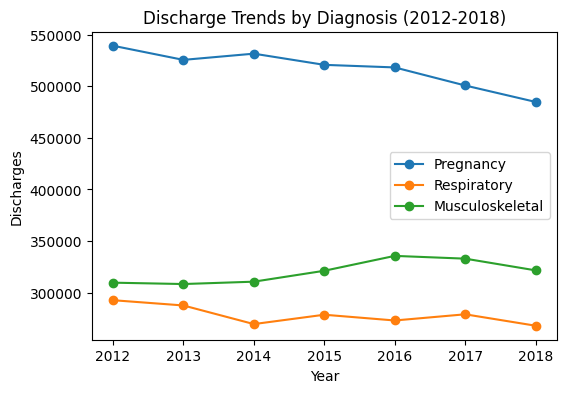

In [ ]:
# plotting a lineplot for the top most diagnostic descriptions from 2012 to 2018
pregnancy_discharges = discharges[discharges['DiagnosticDescription'] == 'PREGNANCY, CHILDBIRTH, & THE PUERPERIUM']
orthopedic_discharges=discharges[discharges['DiagnosticDescription'] == 'MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DISEASES & DISORDERS']
respiratory_discharges=discharges[discharges['DiagnosticDescription'] == 'RESPIRATORY SYSTEM, DISEASES & DISORDERS']
pregnancy_discharges_data = pregnancy_discharges.groupby('Year')['Discharges'].sum().reset_index()
resp_data = respiratory_discharges.groupby('Year')['Discharges'].sum().reset_index()
ortho_data = orthopedic_discharges.groupby('Year')['Discharges'].sum().reset_index()
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pregnancy_discharges_data['Year'], pregnancy_discharges_data['Discharges'], marker='o',label='Pregnancy')
ax.plot(resp_data['Year'], resp_data['Discharges'], marker='o', label='Respiratory')
ax.plot(ortho_data['Year'], ortho_data['Discharges'], marker='o', label='Musculoskeletal')
ax.set_xlabel('Year')
ax.set_ylabel('Discharges')
ax.set_title('Discharge Trends by Diagnosis (2012-2018)')
ax.legend()
plt.show()

From the lineplot, Pregnancy/childbirth-related discharges demonstrate the most rapid upward trajectory, declined from just under 540k discharges in 2012 to over 480k by 2018 as both birth rates and preferences for hospital deliveries increase.

By comparison, respiratory and musculoskeletal discharge volumes show slower incremental growth between 2-7% during the same period. This indicates these service lines are more stable. While Pressure still exists to expand capacity, the gaps are less pronounced than surging maternal health demand.

In [ ]:
# filtering the dataframe to include 2018 data
year_2018 = discharges["Year"] == 2018
discharges_2018 = discharges[year_2018]

The data is grouped to get the total discharges for various counties in california state. Then merged with the county population data from the previous dataset to have the required columns like counties, population, discharges.

In [ ]:
# aggregating the discharges by patient county
discharges_2018 = discharges_2018.groupby("COUNTY").agg({"Year":"last","Discharges":"sum"}).reset_index()
discharges_2018 = discharges_2018.set_index("Year")

In [ ]:
# merging the county population dataset with the discharges aggregated subset
discharges_2018['COUNTY'] = discharges_2018['COUNTY'].str.strip()
ca_population_2018['COUNTY'] = ca_population_2018['COUNTY'].str.strip()
population_discharges=pd.merge(ca_population_2018,discharges_2018,on="COUNTY",how="inner")
population_discharges

,COUNTY,2018 population,Discharges
0,Alameda,1651760,132049.0
1,Alpine,1159,57.0
2,Amador,37519,4560.0
3,Butte,226098,35469.0
4,Calaveras,45155,4798.0
5,Colusa,21982,2354.0
6,Contra Costa,1143188,97964.0
7,Del Norte,26895,2515.0
8,El Dorado,187940,17427.0
9,Fresno,1003012,103902.0




---



# **Data - Inpatient readmissions in California hospitals**
This third dataset contains the statewide number and (unadjusted) rate for all-cause, unplanned, 30-day inpatient readmissions in California hospitals. Data are categorized by age, sex, race/ethnicity, expected payer and county.
This data supports more complex regression analysis to uncover interactions between age, gender, region and other factors influencing odds of readmission. This data by county and patient attributes substantially expands the potential analyses around drivers of geographic and temporal variances in hospital readmissions, better informing community health initiatives to reduce these rates.


The dataset is loaded and then the appropriate data transformation is performed such as renaming the columns, changing the data types, and cleaning/removing the extra spaces.

In [ ]:
#reading the inpatient readmissions file and replacing the NaN values with zero
readmissions=pd.read_csv('/content/allcauseunplanned30-dayhospitalreadmissionratecalifornia2011_2022.csv', na_values=['NaN', 'nan']).fillna(0)
readmissions.set_index("Year")

,Strata,Strata Name,County,Total Admits (ICD-9),30-day Readmits (ICD-9),30-day Readmission Rate (ICD-9),Total Admits (ICD-10),30-day Readmits (ICD-10),30-day Readmission Rate (ICD-10)
Year,,,,,,,,,
2011,Overall,Overall,State,1948641.0,272268.0,14%,0,0,0
2011,Age,18 to 44 years,State,326070.0,36855.0,11.30%,0,0,0
2011,Age,45 to 64 years,State,659801.0,90891.0,13.80%,0,0,0
2011,Age,65 years and above,State,962771.0,144522.0,15%,0,0,0
2011,Sex,Male,State,901776.0,132417.0,14.70%,0,0,0
...,...,...,...,...,...,...,...,...,...
2022,Overall,Overall,Tulare,0.0,0.0,0,18119,2204,12.16%
2022,Overall,Overall,Tuolumne,0.0,0.0,0,3236,472,14.59%
2022,Overall,Overall,Ventura,0.0,0.0,0,34253,4771,13.93%


In [ ]:
# renaming the county column name
readmissions=readmissions.rename(columns={"County":"COUNTY"})

In [ ]:
# a function to convert columns object data type to float data type
def convert_columns_to_float(dataframe, columns):
    """
    This function returns the data frame with the columns converted to year.
    (object,date)-->(object,float)
    """
    data = dataframe.copy()
    for column in columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        data[column] = data[column].astype('float64')
    return data

In [ ]:
columns_to_convert = ['Total Admits (ICD-10)', '30-day Readmits (ICD-10) ']
readmissions=convert_columns_to_float(readmissions,columns_to_convert)

In [ ]:
# a function for converting object data type to float data type
def convert_object_to_float(dataframe, column):
    """
    This function returns the dataframe with a column converted to float by removing extra symbols.
    (object, object) --> (object, float)
    """
    data = dataframe.copy()
    data[column] = data[column].str.rstrip('%').astype('float')
    return data

In [ ]:
columns_to_convert = ["30-day Readmission Rate (ICD-9)", "30-day Readmission Rate (ICD-10)"]
for column in columns_to_convert:
    readmissions = convert_object_to_float(readmissions, column)

In [ ]:
# a function for removing the extra spaces and cleaning the column names
def column_name(dataframe):
  """
  This function returns the dataframe with cleaned column names by removing the extra spaces before, after and in between the words.
  (object)-->(object)
  """
  for col in readmissions.columns:
    readmissions.rename(columns={col: col.strip().replace(' ', '_')}, inplace=True)
  return dataframe

In [ ]:
readmissions=column_name(readmissions)

**Aggregating**

The data after cleaning is then grouped to include the various strata and 30-day readmissions for them. And then, a visualization is plotted to show the distribution of various groups based on age, expected insurance payer, sex, overall state, ethnic groups. This data highlights patient groups with elevated risks of readmission where transitional programs should focus. Readmissions may cluster around ages, races or insurance statuses.
Payer mix indicates healthcare access barriers in lower income areas which could inform financial assistance programs to encourage follow-up care.


In [ ]:
# Grouping 'Strata' and average of '30-day_Readmits_(ICD-10)' column
strata_based_readmits= readmissions.groupby(['Strata', 'Strata_Name'])[['30-day_Readmits_(ICD-10)']].mean().reset_index()
strata_based_readmits.rename(columns={'30-day_Readmits_(ICD-10)':'average 30-day readmits'})

,Strata,Strata_Name,average 30-day readmits
0,Age,18 to 44 years,19732.583333
1,Age,45 to 64 years,48925.333333
2,Age,65 years and above,82730.416667
3,Expected Payer,Medi-Cal,34661.416667
4,Expected Payer,MediCare,90636.750000
5,Expected Payer,Other,2647.166667
6,Expected Payer,Private,22460.666667
7,Expected Payer,Self-Pay,982.333333
8,Overall,Overall,4652.032486
9,Race-Ethnicity,African-American,17917.333333


**Data visualization-4**

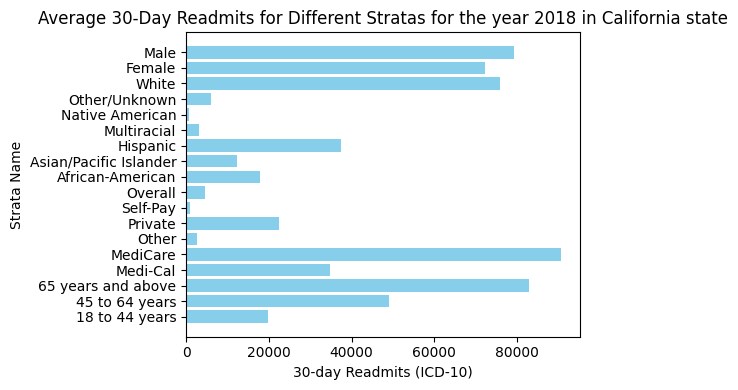

In [ ]:
# plotting a horizontal bar plot to get the total readmits for different stratas for the year 2018 in california state
plt.figure(figsize=(6, 4))
plt.barh(strata_based_readmits['Strata_Name'], strata_based_readmits['30-day_Readmits_(ICD-10)'], color='skyblue')
plt.xlabel('30-day Readmits (ICD-10)')
plt.ylabel('Strata Name')
plt.title('Average 30-Day Readmits for Different Stratas for the year 2018 in California state')
plt.tight_layout()
plt.show()

**Interpretation**

The blue bars in the horizontal barplot represent the rate of readmits for each strata category, indexed on the y-axis. Strata are grouped by type of sex, race,insurance coverage, age. It is clear that male population had more readmits compared to female. While in race, white population had more readmits than other races.We observe Self-pay beneficiaries had the lowest hospital bounce-back rates. However, the Medicare population demonstrates significantly elevated rates approaching 18% readmissions within a month post-discharge. When it comes to age, 65 years and above group had more readmits than other age groups.

**Pivoting**

The transformed dataset is pivoted to get the strata and strata name as index and 30-day readmits as column. Then, it is filtered to get the 2018 data. The data obtained by using aggregate function can be produced using the pivot but aggregation is used to group the data by using sum, mean, min, max.

In [ ]:
# pivoting the dataframe
readmits_long = pd.pivot_table(readmissions, index=['Year', 'Strata', 'Strata_Name'], values=['30-day_Readmits_(ICD-10)'], fill_value=0)
readmits_2018_data = readmits_long.loc[2018, :, :]
readmits_2018_data

30-day_Readmits_(ICD-10)
Strata         Strata_Name                                     
Age            18 to 44 years                      35161.000000
               45 to 64 years                      89815.000000
               65 years and above                 150539.000000
Expected Payer Medi-Cal                            61814.000000
               MediCare                           165581.000000
               Other                                4451.000000
               Private                             41772.000000
               Self-Pay                             1897.000000
Overall        Overall                              9160.338983
Race-Ethnicity African-American                    33262.000000
               Asian/Pacific Islander              22622.000000
               Hispanic                            66002.000000
               Native American                      1146.000000
               Other/Unknown                       11349.000000
               White                              141134.000000
Sex            Female                             131904.000000
               Male                               143611.000000

The dataframe is filtered to get the county information of 2018 year having total admits, readmits and readmission rate columns which can be useful to merge with the previously merged dataframe to get the useful information.

In [ ]:
# filtering the dataframe
state=readmissions["Strata"]=="Overall"
total_admits_icd10=readmissions['Total_Admits_(ICD-10)']!=0
readmits_icd10=readmissions["30-day_Readmits_(ICD-10)"]!=0
readmission_rate_icd10=readmissions["30-day_Readmission_Rate_(ICD-10)"]!=0
only_2018=readmissions["Year"]==2018
readmits=readmissions[total_admits_icd10 & readmits_icd10 & readmission_rate_icd10 & state & only_2018]
readmits.drop(columns=["Total_Admits_(ICD-9)","30-day_Readmits_(ICD-9)","30-day_Readmission_Rate_(ICD-9)","Strata","Strata_Name"],inplace=True)
readmits

<ipython-input-83-88885af0072f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmits.drop(columns=["Total_Admits_(ICD-9)","30-day_Readmits_(ICD-9)","30-day_Readmission_Rate_(ICD-9)","Strata","Strata_Name"],inplace=True)


,Year,COUNTY,Total_Admits_(ICD-10),30-day_Readmits_(ICD-10),30-day_Readmission_Rate_(ICD-10)
525,2018,State,1867521.0,275515.0,14.75
542,2018,Alameda,62646.0,9882.0,15.77
543,2018,Alpine,18.0,2.0,11.11
544,2018,Amador,2877.0,458.0,15.92
545,2018,Butte,23190.0,4151.0,17.90
546,2018,Calaveras,2941.0,411.0,13.97
547,2018,Colusa,1195.0,185.0,15.48
548,2018,Contra Costa,51183.0,7884.0,15.40
549,2018,Del Norte,1416.0,178.0,12.57
550,2018,El Dorado,10371.0,1434.0,13.83




---



# **Merging the Data**

Merging the discharges and county population data merged data with the readmissions data to get the population, discharges, total admits, 30-day readmits and 30-day readmission rate data.

In [ ]:
# merging discharges 2018 and readmissions data
population_discharges['COUNTY'] = population_discharges['COUNTY'].str.strip()
readmits['COUNTY'] = readmits['COUNTY'].str.strip()
readmissions_2018=pd.merge(population_discharges,readmits,on="COUNTY",how="inner")
readmissions_2018.drop(columns=["Year"],inplace=True)

<ipython-input-84-8549a67ffe9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmits['COUNTY'] = readmits['COUNTY'].str.strip()


The data having readmissions, discharges and population information (previously merged) is joined with the facility type inpatient visits and again joined with the hospice type inpatient visits because these hospice types are the values in a single column from inpatient visits dataset.

In [ ]:
# joining the readmission 2018 dataframe with the facility visits dataframe
visits_readmissions_data = readmissions_2018.join(facility_visits.set_index("COUNTY"), on="COUNTY", how="inner")
visits_readmissions_data.drop(columns=["Demographics","Year"],inplace=True)
visits_readmissions_data.set_index("COUNTY")

,2018 population,Discharges,Total_Admits_(ICD-10),30-day_Readmits_(ICD-10),30-day_Readmission_Rate_(ICD-10),Hospice_Type,InpatientVisits
COUNTY,,,,,,,
Alameda,1651760,132049.0,62646.0,9882.0,15.77,Facility,306
Amador,37519,4560.0,2877.0,458.0,15.92,Facility,5
Butte,226098,35469.0,23190.0,4151.0,17.90,Facility,32
Calaveras,45155,4798.0,2941.0,411.0,13.97,Facility,13
Colusa,21982,2354.0,1195.0,185.0,15.48,Facility,2
Contra Costa,1143188,97964.0,51183.0,7884.0,15.40,Facility,228
Del Norte,26895,2515.0,1416.0,178.0,12.57,Facility,2
El Dorado,187940,17427.0,10371.0,1434.0,13.83,Facility,19
Fresno,1003012,103902.0,48893.0,7348.0,15.03,Facility,208


Finally merging the necessary columns to get the useful information that is california hospital discharge and readmission analysis.

In [ ]:
# merging the visits_readmissions data with the home visits data from the inpatients visits dataframe
hospital_readmission_2018=pd.merge(visits_readmissions_data,visits_home,on="COUNTY")
hospital_readmission_2018.drop(columns=["Demographics","Year","Hospice_Type_x","Hospice_Type_y"],inplace=True)
hospital_readmission_2018=hospital_readmission_2018.rename(columns={"InpatientVisits_x":"Facility_inpatient_visits","InpatientVisits_y":"Home_inpatient_visits"})
hospital_readmission_2018.set_index("COUNTY")

,2018 population,Discharges,Total_Admits_(ICD-10),30-day_Readmits_(ICD-10),30-day_Readmission_Rate_(ICD-10),Facility_inpatient_visits,Home_inpatient_visits
COUNTY,,,,,,,
Alameda,1651760,132049.0,62646.0,9882.0,15.77,306,1301
Amador,37519,4560.0,2877.0,458.0,15.92,5,67
Butte,226098,35469.0,23190.0,4151.0,17.90,32,285
Calaveras,45155,4798.0,2941.0,411.0,13.97,13,57
Colusa,21982,2354.0,1195.0,185.0,15.48,2,17
Contra Costa,1143188,97964.0,51183.0,7884.0,15.40,228,1054
Del Norte,26895,2515.0,1416.0,178.0,12.57,2,6
El Dorado,187940,17427.0,10371.0,1434.0,13.83,19,259
Fresno,1003012,103902.0,48893.0,7348.0,15.03,208,941


**Data visualization-5**

A scatter plot showing the relation between the population and home based inpatient visits is plotted.

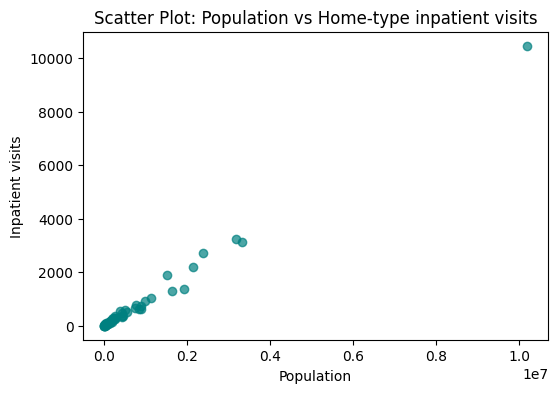

In [ ]:
# plotting a scatterplot for population versus home-based hospice type inpatient visits in 2018 for california state
plt.figure(figsize=(6, 4))
plt.scatter(hospital_readmission_2018['2018 population'], hospital_readmission_2018['Home_inpatient_visits'], c='teal', alpha=0.7)
plt.title('Scatter Plot: Population vs Home-type inpatient visits')
plt.xlabel('Population')
plt.ylabel('Inpatient visits')
plt.show()

**Interpretation**

This scatter plot visualizes the correlation between county population size (x-axis) and number of inpatient visits for home-based hospices (y-axis) in 2018. Each dot represents one of California's counties. The upward sloping scatter plot shows a moderate positive correlation between these variables. Counties with larger population sizes tend to have higher volumes of home hospice inpatient visits. Visually we observe the cluster of dots extending from small counties with populations <50K and low inpatient visits <100, up through the largest county, Los Angeles, with 10M+ residents and 10K+ home hospice visits.

**Data visualization-6**

Plotting a stacked bar plot showing discharges and readmissions by various counties in 2018 for California state.

<ipython-input-88-9766464331dc>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  readmits.set_xticklabels(hospital_readmission_2018['COUNTY'], rotation=90)


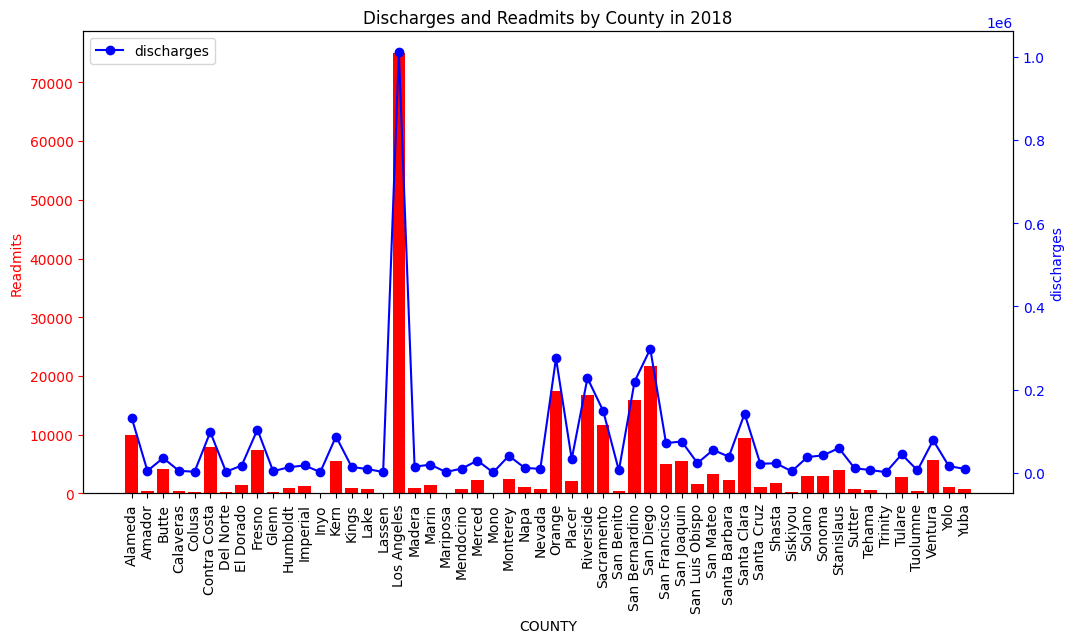

In [ ]:
# plotting a stacked bar plot for showing discharges and readmissions by county in 2018 for california state
fig, readmits = plt.subplots(figsize=(12, 6))
# plotting a bar plot for discharges on y-axis
readmits.bar(hospital_readmission_2018['COUNTY'], hospital_readmission_2018['30-day_Readmits_(ICD-10)'], color='red', label='readmits')
readmits.set_xlabel('COUNTY')
readmits.set_ylabel('Readmits', color='red')
readmits.tick_params('y', colors='red')
readmits.set_xticklabels(hospital_readmission_2018['COUNTY'], rotation=90)
# creating a second y-axis for population
discharges = readmits.twinx()
discharges.plot(hospital_readmission_2018['COUNTY'], hospital_readmission_2018['Discharges'], color='blue', marker="o", label='discharges')
discharges.set_ylabel('discharges', color='blue')
discharges.tick_params('y', colors='blue')
# creating title and legend
plt.title('Discharges and Readmits by County in 2018')
plt.legend(loc='upper left')
plt.show()

**Interpretation**

This visualization shows the discharge data to the primary (left) y-axis in blue and readmits to the secondary (right) y-axis in red, we can view both metrics simultaneously on a per county basis. The most striking trend is the high degree of variation across counties. Some counties with relatively low total discharges like Amador, Del Norte and Inyo still demonstrate higher than average readmission rates. Conversely, certain populous counties like Los Angeles see very high overall discharges as well as readmits.Overall, indexing discharge and readmission metrics together at the county level revealed the system performance beyond what aggregate state averages would show. It highlighted the specific counties significantly above or below typical readmission rates that may warrant deeper study to understand what socioeconomic, infrastructure, or practice pattern factors influence their results.



---



# **Conclusion**


In this project, I have analyzed various datasets related to hospice care, hospital discharges, readmissions, and population demographics across counties in California.

Key findings include:


*  For discharges in 2018, Pregnancy diagnosis,
Muskoloskeletal system and connective tissue diagnosis, mental diseases and disorders,newborns and neonate conditions, respiratory system diagnosis were the top diagnoses making up nearly half of inpatient visits.
*  Home-based hospices saw more even distribution across inpatient visits.
*  There is an downward 3-year trend in discharges for pregnancies/childbirth from 2012-2018, indicating this is a decreasing utilization area.
*  Overall hospital readmission rates in 2018 were highest for the Medicare population at 17.8%, versus 15.3% Medi-cal insured and 13.9% privately insured.
This signals an opportunity to focus readmission reduction efforts on Medicare patients.
*  A moderate positive correlation exists between county population size and utilization of home-based hospice inpatient visits. More populous areas see higher demand for home-based end of life care.
*  Counties show large variation in discharge and readmission volumes – while discharge rates track closer to overall population size, certain counties like Los angeles exhibit disproportionately high readmits.

In summary, analyzing these interrelated datasets provides useful insights on healthcare utilization patterns and outcomes that could inform planning and policies around hospice, hospital, and post-acute care capacity and quality improvement initiatives in California.Similarly, patterns and discrepancies in outcomes data, like readmissions, can help target locations that may benefit most from care transition programs or other interventions to drive improvement. Key opportunities exist to address readmissions for Medicare patients, meet demand for home-based hospice services, and support counties struggling with high hospital readmissions.

Overall these datapoints and analytical perspectives could directly influence planning decisions around hospital and hospice capacity expansion, discharge protocol modifications, targeting counties in need of transitional care resources, and tailoring services to match projected demographic-driven utilization patterns.




---

